<a href="https://colab.research.google.com/github/catag990/SynopsisZealand/blob/main/Synopsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import kagglehub
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import PIL.ImageFile
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization, Rescaling

#Allow loading of truncated images, this makes the program continue even if the dataset has corrupt images
PIL.ImageFile.LOAD_TRUNCATED_IMAGES = True

# Download latest version of the dataset
path = kagglehub.dataset_download("abdelghaniaaba/wildfire-prediction-dataset")

In [ ]:
train_dir = os.path.join(path, "train")
val_dir = os.path.join(path, "valid")
test_dir = os.path.join(path, "test")

datagen = ImageDataGenerator(dtype="float32", rescale= 1./255)

batchSize = 32
imageSize = (128,128)

train_ds = datagen.flow_from_directory(
    train_dir,
    target_size=imageSize,
    batch_size=batchSize,
    class_mode ="binary"
)

val_ds = datagen.flow_from_directory(
    val_dir,
    target_size=imageSize,
    batch_size=batchSize,
    class_mode ="binary"
)

test_ds = datagen.flow_from_directory(
    test_dir,
    target_size=imageSize,
    batch_size=batchSize,
    class_mode ="binary"
)

Found 30250 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.


In [ ]:
tf.random.set_seed(23)

#CNN Model
model = Sequential([
    #Uses relu to make the training faster and makes the model deeper and more efficient
    #First layer, to learn basic patterns
    Conv2D(64, 7, activation="relu", input_shape=(128, 128, 3), padding="same"),
    #Makes it more efficient (takes half the time to execute) and less likely to overfit
    #Makes it better in learning patterns, even in different positions
    MaxPooling2D(2),

    #Second layer, learn more complex forms
    Conv2D(128, 3, activation="relu", padding="same"),
    MaxPooling2D(2),

    #Third layer, detects abstract structures
    Conv2D(256, 3, activation="relu", padding="same"),
    MaxPooling2D(2),

    Flatten(),

    Dense(128, activation="relu"),
    Dropout(0.5),
    #To classify in 2 classes (wildfire and no wildfire), using 1 neuron
    Dense(1, activation="sigmoid")
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", "recall"]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,767,361 (33.44 MB)

 Trainable params: 8,767,361 (33.44 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Make sure to use GPU in the runtime type to make this faster
#It's 5 hours vs 15 minutes aprox.
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


946/946 ━━━━━━━━━━━━━━━━━━━━ 97s 95ms/step - accuracy: 0.8645 - loss: 0.3085 - recall: 0.8541 - val_accuracy: 0.9278 - val_loss: 0.1965 - val_recall: 0.9856
Epoch 2/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 85s 90ms/step - accuracy: 0.9345 - loss: 0.1804 - recall: 0.9523 - val_accuracy: 0.9371 - val_loss: 0.1693 - val_recall: 0.9195
Epoch 3/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 83s 87ms/step - accuracy: 0.9396 - loss: 0.1680 - recall: 0.9551 - val_accuracy: 0.9521 - val_loss: 0.1304 - val_recall: 0.9782
Epoch 4/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 90s 95ms/step - accuracy: 0.9442 - loss: 0.1534 - recall: 0.9615 - val_accuracy: 0.9421 - val_loss: 0.1563 - val_recall: 0.9195
Epoch 5/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.9534 - loss: 0.1347 - recall: 0.9650 - val_accuracy: 0.9581 - val_loss: 0.1169 - val_recall: 0.9764
Epoch 6/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 89s 94ms/step - accuracy: 0.9570 - loss: 0.1200 - recall: 0.9699 - val_accuracy: 0.9560 - val_loss: 0.1228 - val_recall: 0.9681
Epo

In [ ]:
test_loss, test_acc, test_recall = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc*100:.2f}%")
print(f"Test loss: {test_loss*100:.2f}%")
print(f"Test recall: {test_recall*100:.2f}%")

197/197 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.9595 - loss: 0.1136 - recall: 0.9778
Test accuracy: 96.54%
Test loss: 10.67%
Test recall: 98.16%


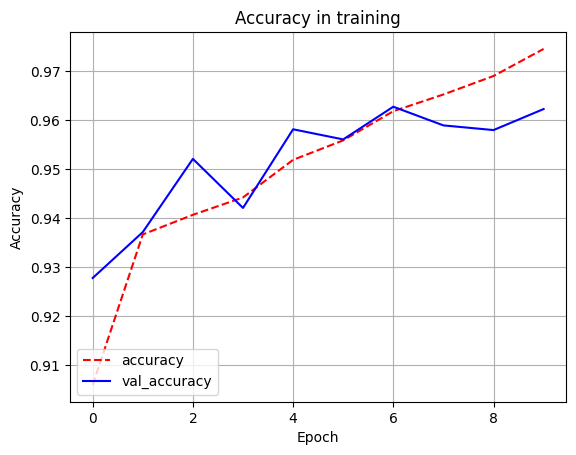

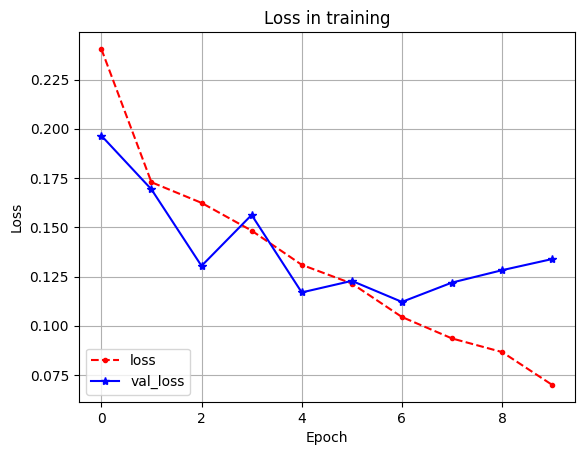

In [ ]:
pd.DataFrame(history.history)[["accuracy","val_accuracy"]].plot(
    grid=True, xlabel="Epoch", ylabel="Accuracy", title= "Accuracy in training",
    style=["r--", "b-"])
plt.legend(loc="lower left")
plt.show()

pd.DataFrame(history.history)[["loss","val_loss"]].plot(
    grid=True, xlabel="Epoch", ylabel="Loss", title= "Loss in training",
    style=["r--.", "b-*"])
plt.legend(loc="lower left")
plt.show()

In [ ]:
test_ds = datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode="binary",
    #Important to have the correct labels with the images
    shuffle=False
)

Found 6300 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


197/197 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step
              precision    recall  f1-score   support

  nowildfire       0.98      0.92      0.95      2820
    wildfire       0.94      0.99      0.96      3480

    accuracy                           0.96      6300
   macro avg       0.96      0.96      0.96      6300
weighted avg       0.96      0.96      0.96      6300



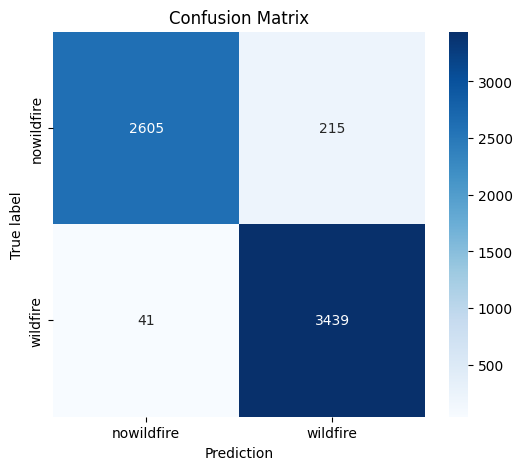

In [ ]:
#To start from the first image
test_ds.reset()

true_classes = test_ds.classes
predictions = model.predict(test_ds)
#Changes the threshold to have a better recall
predicted_classes = (predictions > 0.25).astype("int").flatten()

classes = test_ds.class_indices.keys()

print(classification_report(true_classes, predicted_classes, target_names=classes))

cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Prediction")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()
